In [7]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully.")


All libraries imported successfully.


In [2]:
# --- Load the Dataset ---
# We use the cleaned CSV file provided.
file_path = '/Users/clarencemarvin/Downloads/centanet_cleaned_proximity.csv'

try:
    data = pd.read_csv(file_path)
    print(f"Dataset loaded successfully: {file_path}")
    print(f"Dataset shape: {data.shape}")
except FileNotFoundError:
    print(f"ERROR: File not found at {file_path}")
    print("Please make sure the file 'centanet_data_cleaned_for_model.csv' is in the correct folder.")

# Display basic data info to confirm
if 'data' in locals():
    print("\nData Head:")
    print(data.head())
    print("\nData Types:")
    print(data.info())

Dataset loaded successfully: /Users/clarencemarvin/Downloads/centanet_cleaned_proximity.csv
Dataset shape: (6156, 22)

Data Head:
                           property_name            district  bedroom_count  \
0                    LAKE SILVER Tower 5          Wu Kai Sha              2   
1      TSUEN KING GARDEN PHASE 2 BLOCK 8  Tsuen King Circuit              3   
2       BELVEDERE GARDEN PHASE 1 BLOCK 3           Belvedere              3   
3             MARBELLA BLOCK 1 (TOWER A)          Ma On Shan              3   
4  LOHAS PARK PHASE 10 LP10 Tower 1 (1A)          Lohas Park              3   

      price  property_age  saleable_area  pet_policy   latitude   longitude  \
0   7600000            16            573        True  22.428921  114.244390   
1   5800000            37            577       False  22.378113  114.110063   
2   5400000            38            644       False  22.372633  114.101914   
3   7300000            24            737        True  22.427676  114.240275   


=== VIF table (predictors only) ===
                                       feature          VIF
4                                     latitude  4600.462413
5                                    longitude  4498.337194
8                       total_poi_within_1000m    37.721325
10             category_Education_within_2000m    34.687240
11            category_Recreation_within_1000m    32.148218
2                                saleable_area    28.248845
0                                bedroom_count    27.799400
14              category_Religion_within_2000m    27.123185
15        category_Transportation_within_1000m    23.049908
12               category_Medical_within_2000m    21.657976
17                  distance_to_nearest_mtr_km    14.426852
6                           travel_time_to_cbd    14.008322
9   category_Community_Facilities_within_1000m    12.398573
13         category_Public_Market_within_1000m    10.506183
1                                 property_age     4.190262
16  

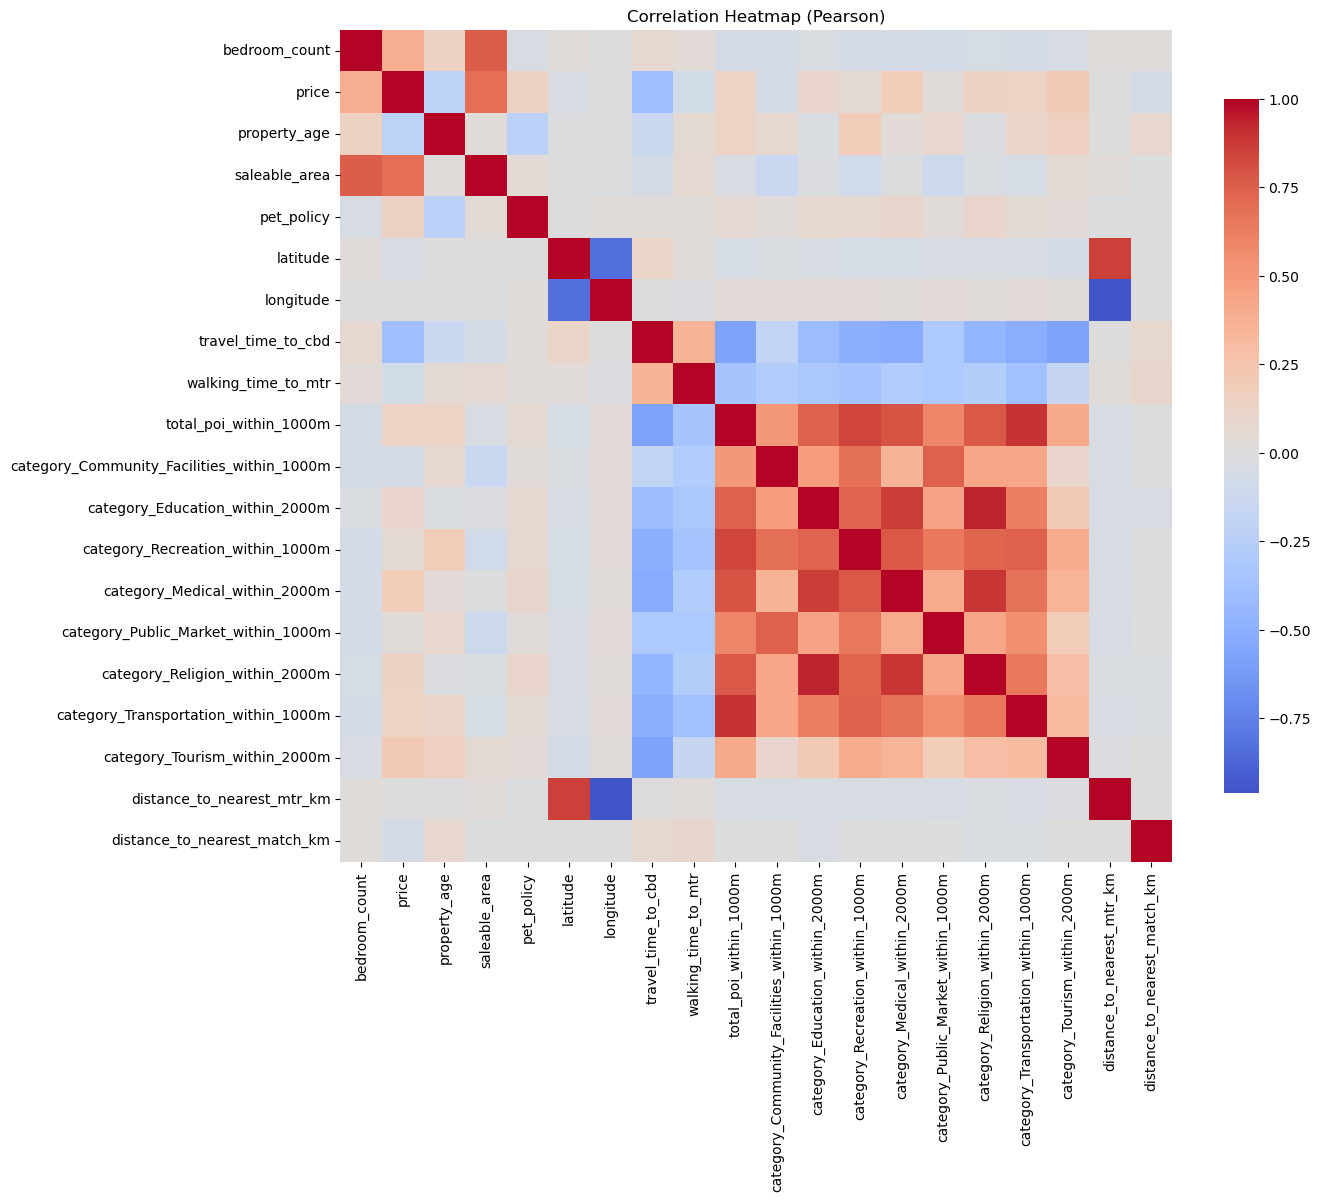


=== Highly correlated pairs (|corr| >= 0.8) ===
                                var1                                  var2  \
110                        longitude            distance_to_nearest_mtr_km   
157  category_Education_within_2000m        category_Religion_within_2000m   
141           total_poi_within_1000m  category_Transportation_within_1000m   
170    category_Medical_within_2000m        category_Religion_within_2000m   
155  category_Education_within_2000m         category_Medical_within_2000m   
97                          latitude            distance_to_nearest_mtr_km   
137           total_poi_within_1000m      category_Recreation_within_1000m   
85                          latitude                             longitude   

         corr  
110 -0.960605  
157  0.932199  
141  0.895997  
170  0.889091  
155  0.865766  
97   0.859132  
137  0.842438  
85  -0.832626  


In [8]:
df_num = data.drop(columns=["property_name", "district"]).copy()

df_num["pet_policy"] = df_num["pet_policy"].astype(int)
X = df_num.drop(columns=["price"])

vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [
    variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])
]

print("=== VIF table (predictors only) ===")
print(vif.sort_values("VIF", ascending=False))

corr = df_num.corr()  # R

plt.figure(figsize=(14, 12))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    annot=False,
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap (Pearson)")
plt.tight_layout()
plt.show()


threshold = 0.8

mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
corr_upper = corr.where(mask)

high_corr_pairs = (
    corr_upper
    .stack()
    .reset_index()
    .rename(columns={"level_0": "var1", "level_1": "var2", 0: "corr"})
)

high_corr_pairs = high_corr_pairs.loc[
    high_corr_pairs["corr"].abs() >= threshold
].sort_values("corr", key=lambda s: s.abs(), ascending=False)

print(f"\n=== Highly correlated pairs (|corr| >= {threshold}) ===")
print(high_corr_pairs)
